# 2.7.4 Distribución Beta

**Función Gamma:** $\;$ función suave en $\,\mathbb{R}^+$ que interpola la función factorial
$$\Gamma(a)=\int_0^{\infty}x^{a-1}e^{-x}dx\quad\text{para}\;a\in\mathbb{R}^+%
\quad\to\quad%
\Gamma(a)=(a-1)!\quad\text{para}\;a\in\mathbb{N}_1$$

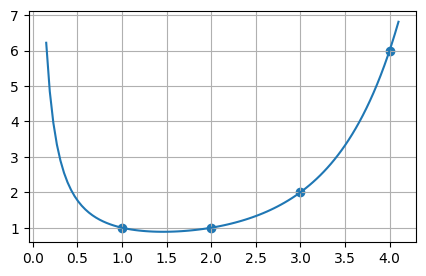

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.special import gamma
x = np.linspace(.15, 4.1, 100); a = np.arange(1, 5); fig = plt.subplots(figsize=(5,3))
plt.grid(); plt.plot(x, gamma(x)); plt.scatter(a, gamma(a));

**Función beta:** $\;$ función suave en $\,\mathbb{R}^+\!\times\mathbb{R}^+$ estrechamente relacionada con los coeficientes binomiales
$$B(a,b)=\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}\quad\text{para}\;a,b\in\mathbb{R}^+%%
\quad\to\quad%
B(a,b)=\frac{a+b}{ab}\frac{1}{\binom{a+b}{a}}\quad\text{para}\;a,b\in\mathbb{N}_1$$

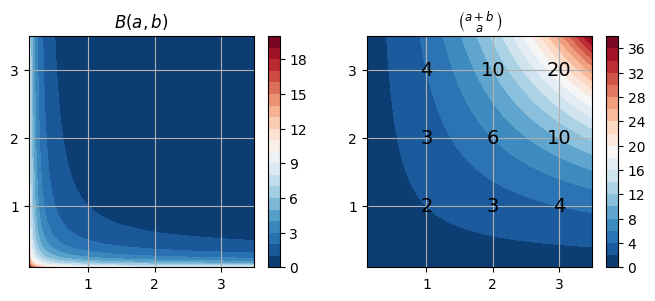

In [2]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.special import beta
R = np.linspace(.1, 3.5, 100); A, B = np.meshgrid(R, R); AB = np.c_[np.ravel(A), np.ravel(B)]
betaab = lambda ab: beta(*ab); Beta = np.apply_along_axis(betaab, 1, AB)
_, axs = plt.subplots(1, 2, figsize=(8, 3)); I = np.arange(1, 4)
ax = axs[0]; ax.grid(); ax.set_yticks(I); ax.set_title(r'$B(a,b)$')
cp = ax.contourf(A, B, Beta.reshape(A.shape), 20, cmap='RdBu_r'); plt.colorbar(cp, ax=ax)
binom = lambda ab: ab.sum() / ab.prod() / beta(*ab); Z = np.apply_along_axis(binom, 1, AB)
ax = axs[1]; ax.grid(); ax.set_yticks(I); ax.set_title(r'$\binom{a+b}{a}$')
cp = ax.contourf(A, B, Z.reshape(A.shape), 22, cmap='RdBu_r'); plt.colorbar(cp, ax=ax)
[ax.text(i, j, f'{binom(np.array([i,j])):.0f}', size=14, ha='center', va='center') for i in I for j in I];

**Distribución Beta:** $\;$ pdf en $[0,1]$ gobernada por dos parámetros positivos, $\,a,b>0$
$$\operatorname*{Beta}(x\mid a,b)=\frac{1}{B(a,b)}x^{a-1}(1-x)^{b-1}$$
* Si $\;a=b=1,\;$ es la uniforme
* Si $\;a,b<1,\;$ es bimodal con picos en $0$ y $1$
* Si $\;a,b>1,\;$ es unimodal

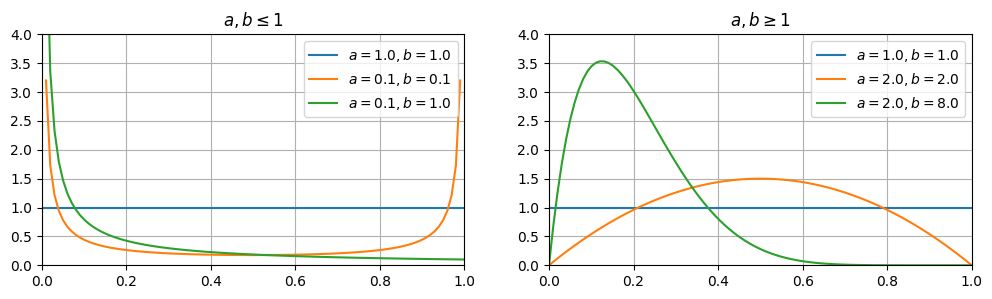

In [3]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import beta
x = np.linspace(0, 1, 100); fig, axs = plt.subplots(1, 2, figsize=(12,3))
ax = axs[0]; ax.grid(); ax.set_xlim(0, 1); ax.set_ylim(0, 4); ax.set_title(r'$a,b\leq 1$')
for a, b in zip([1.0, 0.1, 0.1, 1.0], [1.0, 0.1, 1.0]):
    ax.plot(x, beta.pdf(x, a, b), label=f'$a={a:.1f},b={b:.1f}$'.format(a, b))
ax.legend();
ax = axs[1]; ax.grid(); ax.set_xlim(0, 1); ax.set_ylim(0, 4); ax.set_title(r'$a,b\geq 1$')
for a, b in zip([1.0, 2.0, 2.0], [1.0, 2.0, 8.0]):
    ax.plot(x, beta.pdf(x, a, b), label=f'$a={a:.1f},b={b:.1f}$'.format(a, b))
ax.legend();

**Propiedades:**
* Media: $\;\dfrac{a}{a+b}$
* Moda: $\;\dfrac{a-1}{a+b-2}$
* Varianza: $\;\dfrac{ab}{(a+b)^2(a+b+1)}$